# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [210]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# constants (model will try to predict these values)
N = 100
m = 0.5
b = -2

In [213]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values

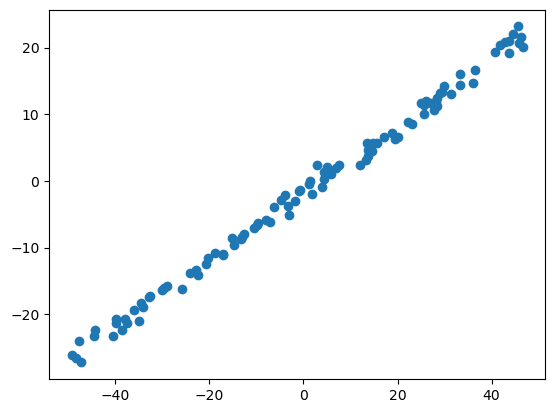

In [214]:
# plot the data
f = plt.scatter(X, Y)

In [215]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [216]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [217]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [218]:
# train the model
num_epochs = 30
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}, Weight: {model.weight.data.numpy()}, Bias: {model.bias.data.numpy()}')

Epoch 1/30, Loss: 1139.5211, Weight: [[17.894289]], Bias: [-0.6483879]
Epoch 2/30, Loss: 230579.5625, Weight: [[-247.20145]], Bias: [-0.95978796]
Epoch 3/30, Loss: 46750080.0000, Weight: [[3527.5278]], Bias: [3.132576]
Epoch 4/30, Loss: 9478691840.0000, Weight: [[-50221.277]], Bias: [-55.473877]
Epoch 5/30, Loss: 1921827602432.0000, Weight: [[715114.25]], Bias: [778.7031]
Epoch 6/30, Loss: 389655270785024.0000, Weight: [[-10182586.]], Bias: [-11099.554]
Epoch 7/30, Loss: 79003526818168832.0000, Weight: [[1.4499104e+08]], Bias: [158035.95]
Epoch 8/30, Loss: 16018159282952339456.0000, Weight: [[-2.0645437e+09]], Bias: [-2250306.]
Epoch 9/30, Loss: 3247719079882518429696.0000, Weight: [[2.939728e+10]], Bias: [32042358.]
Epoch 10/30, Loss: 658483118963262440341504.0000, Weight: [[-4.1859124e+11]], Bias: [-4.562544e+08]
Epoch 11/30, Loss: 133509011209747680783761408.0000, Weight: [[5.960368e+12]], Bias: [6.4966625e+09]
Epoch 12/30, Loss: 27069265811116408115235389440.0000, Weight: [[-8.4870

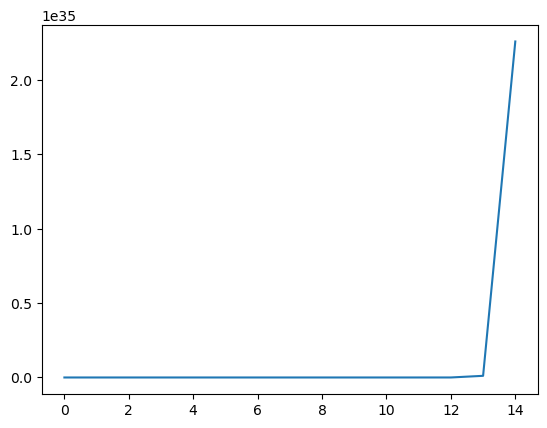

In [219]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

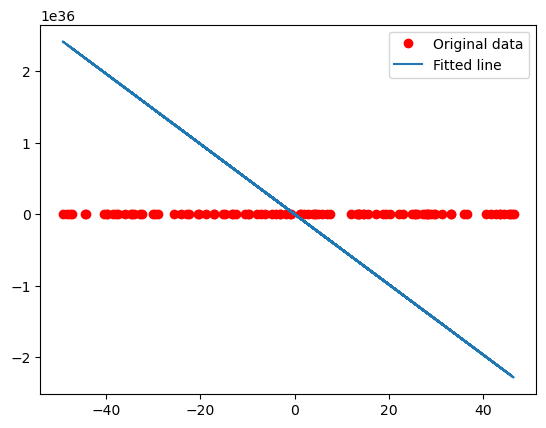

In [220]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [221]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[ 1.61015252e+36]
 [-2.05337530e+36]
 [ 1.71269690e+36]
 [ 1.47334068e+35]
 [ 1.10412098e+36]
 [ 1.01241002e+36]
 [-9.34813684e+34]
 [-1.22461378e+36]
 [-9.21712079e+35]
 [ 3.90616654e+34]
 [-1.42349858e+36]
 [-1.89201031e+35]
 [ 2.34409243e+36]
 [-1.77183739e+36]
 [-1.28060900e+36]
 [-9.59639630e+35]
 [ 7.43619529e+35]
 [-1.08876822e+36]
 [ 1.42716906e+36]
 [-1.39794353e+36]
 [ 2.18902818e+36]
 [-7.24207124e+35]
 [ 1.86677666e+36]
 [-6.56504956e+35]
 [ 6.39086248e+35]
 [ 5.18746315e+35]
 [ 8.37733871e+35]
 [ 2.18008601e+36]
 [-2.42462362e+35]
 [-1.26188857e+36]
 [-2.28826969e+36]
 [ 3.47251728e+35]
 [ 1.56197144e+35]
 [-1.44389385e+35]
 [ 1.46074928e+36]
 [ 1.95850909e+36]
 [-2.18304804e+35]
 [ 6.15852510e+35]
 [-2.18075458e+35]
 [-2.09990854e+36]
 [-3.74822416e+35]
 [ 6.53946282e+35]
 [-2.23810004e+36]
 [ 1.26392165e+36]
 [-2.25128440e+36]
 [-6.59311099e+35]
 [-2.86462058e+35]
 [ 4.87794526e+35]
 [-2.27156443e+36]
 [-2.14557993e+36]
 [-1.36144328e+36]
 [ 1.76584664e+36]
 [ 1.4775453

Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [222]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[-4.9141773e+34]] [-5.356341e+31]
